# Earlier diabetes over years
**Main Idea**
The analysis investigates how the relationship between diabetes and cardiovascular disease (CVD) changes across different years, aiming to understand whether this association has grown stronger, weaker, or remained stable over time.

**Data Plan**
- Source: Longitudinal or pooled cross-sectional dataset with a year column indicating the survey year.

- Variables of Interest: cvd: Binary indicator of cardiovascular disease. diabetes: Binary indicator of diabetes. year: Survey year.
- Cleaning:
    Removed duplicate entries. Ensured consistency in column naming (e.g., renamed cardio to cvd).

**Technical Detail**
- Descriptive Statistics: Computed proportions of CVD by diabetes status across different years. Created a bar plot to visualize how the proportion of CVD among diabetics vs. non-diabetics changes over time.
- Interaction Modeling: Built a logistic regression model using cvd ~ diabetes * year, capturing both the main effect of diabetes and the interaction effects between diabetes and specific years. Used statsmodels.Logit for model fitting. Calculated average marginal effects to quantify the yearly change in diabetes' impact on CVD.

**Main Conclusion**
The relationship between diabetes and CVD risk is consistently significant across all years, indicating a stable positive association.
The strength of this association may vary slightly year to year, but the overall marginal effect of diabetes on the probability of CVD remains elevated—averaging around a 9–10 percentage point increase. This highlights the persistent burden of cardiovascular risk among diabetic individuals, with no major attenuation or escalation over the years studied.



*DATABASE NOTES*

Estimates are considered unreliable. Starting with 2013–2016 data, the reliability of survey percentage estimates is assessed using new multistep National Center for Health Statistics data presentation standards for proportions. Before 2013–2016 data, the reliability of estimates was evaluated based on relative standard errors (RSEs). Data preceded by an asterisk have an RSE of 20%–30%. Data not shown have an RSE greater than 30%. For more information, see Appendix II, Data presentation standards for proportions; Relative standard error (RSE).

-  Data exclude pregnant women. Fasting weights are used to obtain estimates of total, physician-diagnosed, and undiagnosed diabetes prevalence. Examination weights are used to obtain estimates of poor glycemic control. Estimates in this table may differ from other estimates based on the same data and presented elsewhere if different weights, age-adjustment groups, definitions, or trend adjustments are used. Standard errors (SEs) and data for additional years are available in the Excel spreadsheet version of this table on the Health, United States website at: https://www.cdc.gov/nchs/hus/index.htm.

In [48]:
# Diabetes prevalence and glycemic control among adults aged 20 and over, by sex, age, and race and Hispanic origin: United States, selected years 1988-1994 through 2015-2018
# https://www.cdc.gov/nchs/hus/data-finder.htm
import pandas as pd
path = "diabetes_trend.csv"
diabetes_years = pd.read_csv(path)
diabetes_years.head()

,"Sex, age, and race and \nHispanic origin\n20 years and over, age adjusted\4",1988–1994,SE,1999–2002,SE.1,2001–2004,SE.2,2003–2006,SE.3,2005–2008,...,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76
0,All persons\5,8.8,0.5,10.8,0.7,11.7,0.7,11.6,0.7,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Male,9.6,0.6,12.1,1.0,13.4,0.9,12.3,0.8,12.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Female,8.2,0.8,9.7,0.9,10.2,0.8,11.0,0.8,11.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Not Hispanic or Latino:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,White only,7.7,0.6,9.5,0.8,10.0,0.8,9.9,0.8,10.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
diabetes_years.columns.values[0] = "Group"

# Processing -drop unnecessary columns , clean column names,reset index
cleaned = diabetes_years.iloc[:, [0] + [i for i in range(1, diabetes_years.shape[1]) if 'SE' not in diabetes_years.columns[i] and 'Unnamed' not in diabetes_years.columns[i]]]
trans = cleaned.set_index('Group').T

trans.columns = trans.columns.str.strip().str.replace(r'\\.*', '', regex=True)
trans = trans.apply(pd.to_numeric, errors='coerce')

trans = trans.reset_index().rename(columns={'index': 'Year'})


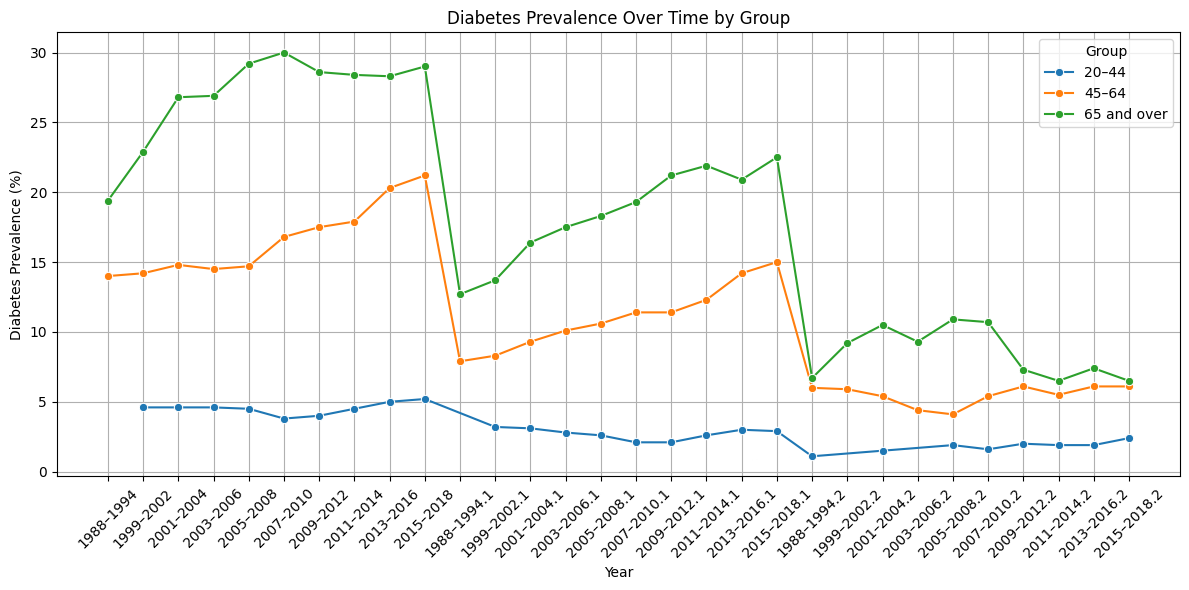

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns


melted = trans.melt(id_vars='Year', var_name='Group', value_name='DiabetesRate')
age_groups = ['20–44','45–64','65 and over']

plt.figure(figsize=(12, 6))
sns.lineplot(data=melted[melted['Group'].isin(age_groups)], x='Year', y='DiabetesRate', hue='Group', marker='o')
plt.title('Diabetes Prevalence Over Time by Group')
plt.ylabel('Diabetes Prevalence (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


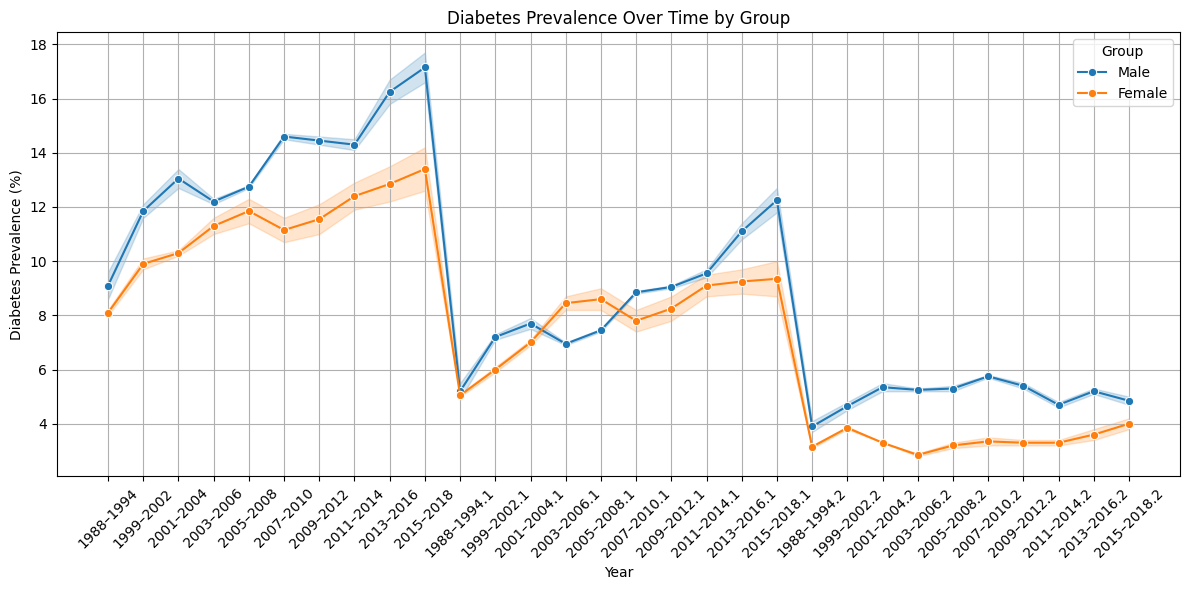

In [14]:
selected_groups = ['Male', 'Female']

plt.figure(figsize=(12, 6))
sns.lineplot(data=melted[melted['Group'].isin(selected_groups)], x='Year', y='DiabetesRate', hue='Group', marker='o')
plt.title('Diabetes Prevalence Over Time by Group')
plt.ylabel('Diabetes Prevalence (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

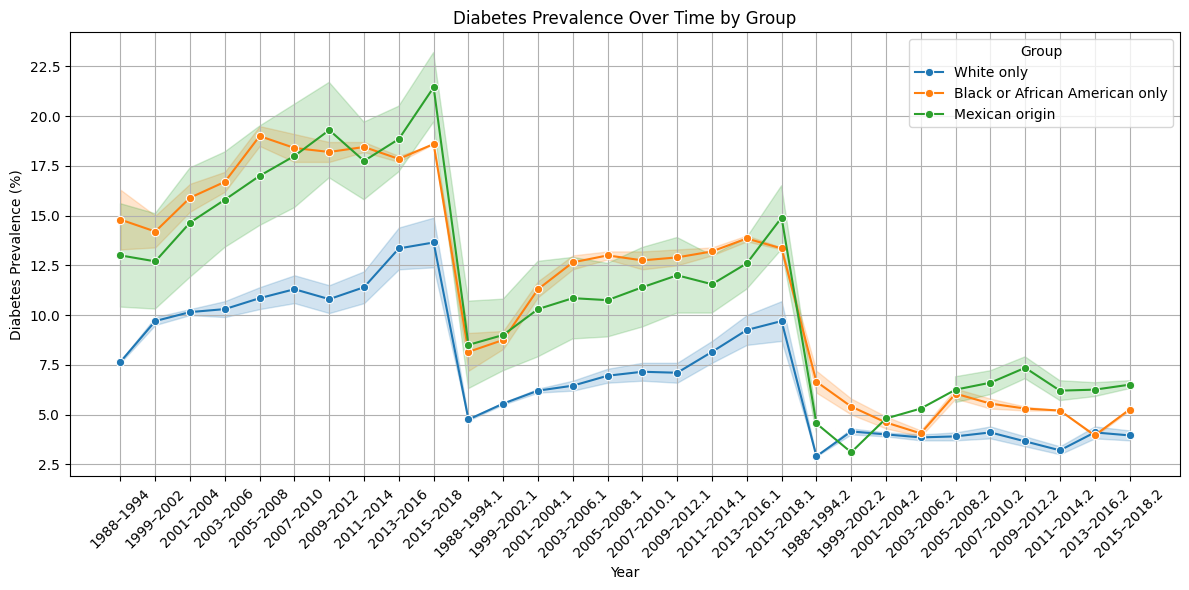

In [15]:
selected_groups = ['White only', 'Black or African American only', 'Mexican origin']

plt.figure(figsize=(12, 6))
sns.lineplot(data=melted[melted['Group'].isin(selected_groups)], x='Year', y='DiabetesRate', hue='Group', marker='o')
plt.title('Diabetes Prevalence Over Time by Group')
plt.ylabel('Diabetes Prevalence (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# split 3 dataframes
df_total = melted[melted['Year'].str.match(r'^\d{4}–\d{4}$')].copy()
df_diagnosed = melted[melted['Year'].str.match(r'^\d{4}–\d{4}\.1$')].copy()
df_undiagnosed = melted[melted['Year'].str.match(r'^\d{4}–\d{4}\.2$')].copy()

df_diagnosed['Year'] = df_diagnosed['Year'].str.replace('.1', '', regex=False)
df_undiagnosed['Year'] = df_undiagnosed['Year'].str.replace('.2', '', regex=False)

df_total['Type'] = 'Total'
df_diagnosed['Type'] = 'Diagnosed'
df_undiagnosed['Type'] = 'Undiagnosed'



In [43]:
# year-over-year increase rates
def compute_clean_rate(df_raw, label):
    # valid groups
    valid_groups = ['20–44', '45–64', '65 and over']
    df_clean = df_raw[df_raw['Group'].isin(valid_groups)].copy()
    df_clean['Year'] = df_clean['Year'].astype(str).str.replace(r'\.1|\.2', '', regex=True)

    df_clean = df_clean.sort_values(['Group', 'Year'])
    df_clean['RateChange'] = df_clean.groupby('Group')['DiabetesRate'].pct_change() * 100
    df_clean['Type'] = label
    
    return df_clean.dropna(subset=['RateChange'])

# add to clean
df_total_rate = compute_clean_rate(df_total, 'All')
df_diagnosed_rate = compute_clean_rate(df_diagnosed, 'Diagnosed')
df_undiagnosed_rate = compute_clean_rate(df_undiagnosed, 'Undiagnosed')



/var/folders/nq/n8qjnkmx7wqdsh3y0nxk8tf40000gn/T/ipykernel_58960/1318077520.py:12: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_clean['RateChange'] = df_clean.groupby('Group')['DiabetesRate'].pct_change() * 100
/var/folders/nq/n8qjnkmx7wqdsh3y0nxk8tf40000gn/T/ipykernel_58960/1318077520.py:12: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_clean['RateChange'] = df_clean.groupby('Group')['DiabetesRate'].pct_change() * 100
/var/folders/nq/n8qjnkmx7wqdsh3y0nxk8tf40000gn/T/ipykernel_58960/1318077520.py:12: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_cha

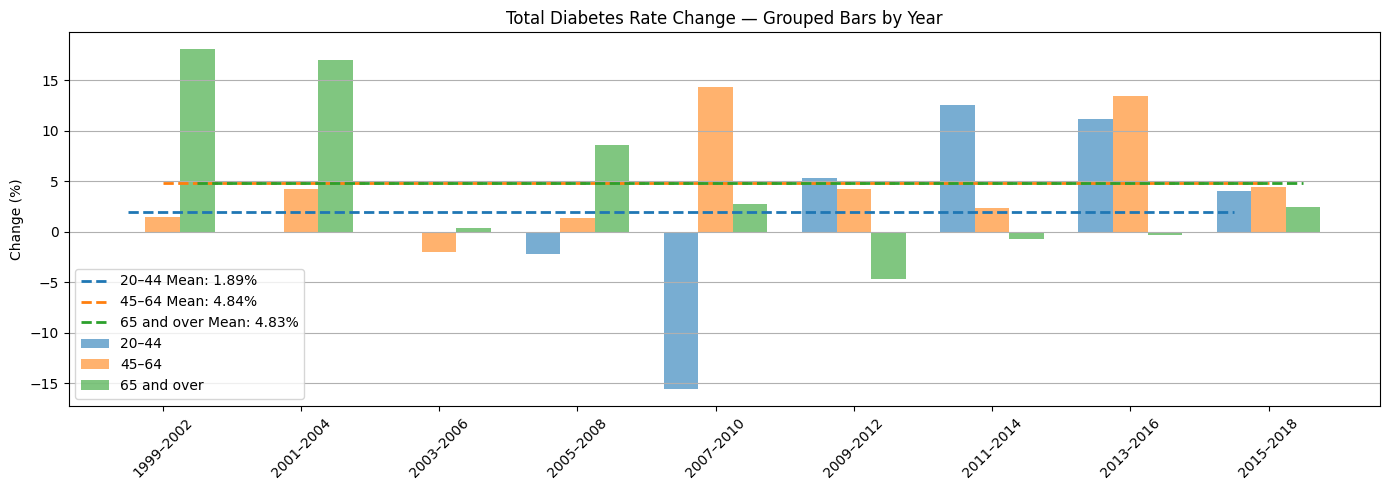

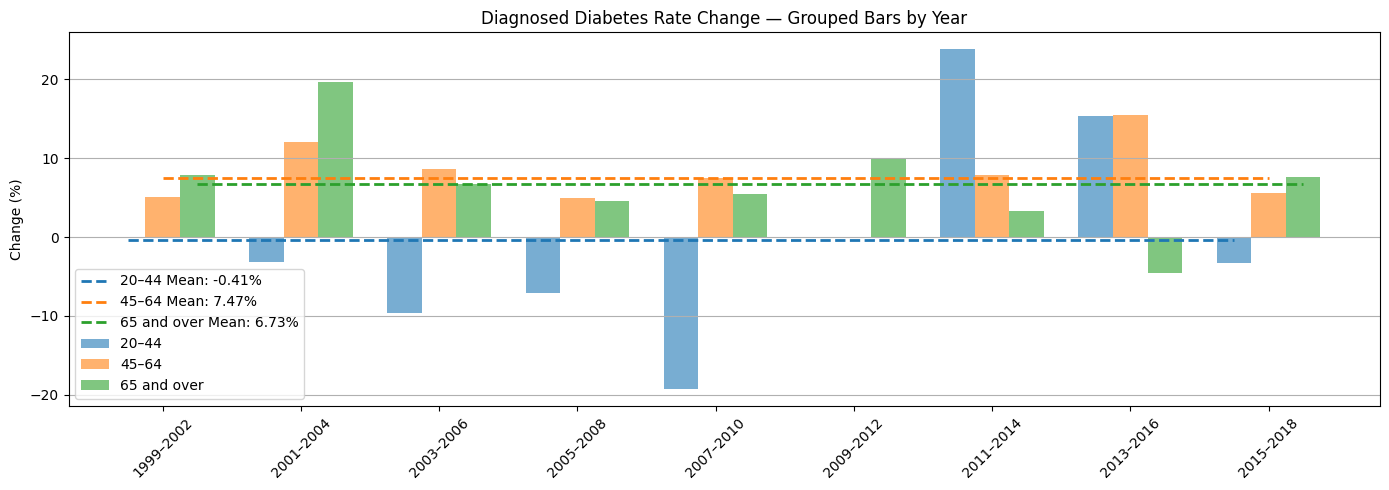

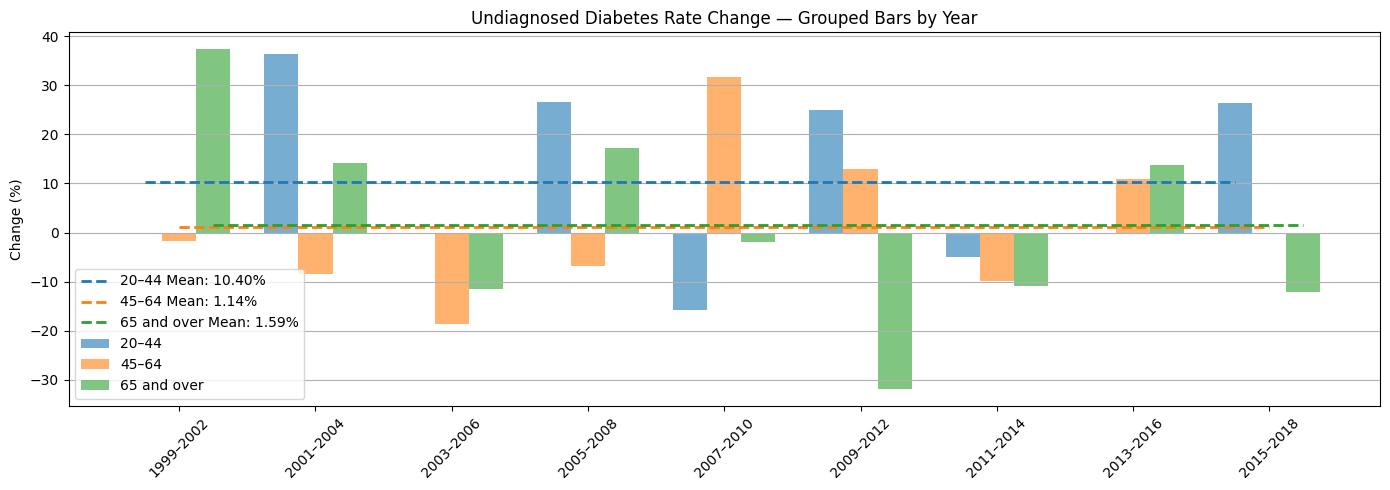

In [ ]:
import numpy as np  
age_palette = {
    '20–44': '#1f77b4',  # b
    '45–64': '#ff7f0e',  # o
    '65 and over': '#2ca02c'  # g
}

def plot_grouped_bars_aligned(df_rate, title):
    groups = age_groups
    years = sorted(df_rate['Year'].unique())
    bar_width = 0.25
    x = np.arange(len(years))  # one x per year

    plt.figure(figsize=(14, 5))

    for i, group in enumerate(groups):
        group_data = df_rate[df_rate['Group'] == group].copy()
        group_data = group_data.set_index('Year').reindex(years) #align
        color = age_palette[group]

        bar_positions = x + (i - 1) * bar_width  # shift bars
        height = group_data['RateChange'].values
        plt.bar(bar_positions, height, width=bar_width, label=group, color=color, alpha=0.6)

        # mean line
        mean_val = group_data['RateChange'].mean()
        plt.plot(bar_positions, [mean_val]*len(height), linestyle='--', color=color, linewidth=2,
                 label=f'{group} Mean: {mean_val:.2f}%')

    plt.title(title)
    plt.ylabel('Change (%)')
    plt.xticks(x, years, rotation=45)
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.legend()
    plt.show()

# Try it on all three datasets
plot_grouped_bars_aligned(df_total_rate, 'Total Diabetes Rate Change — Grouped Bars by Year')
plot_grouped_bars_aligned(df_diagnosed_rate, 'Diagnosed Diabetes Rate Change — Grouped Bars by Year')
plot_grouped_bars_aligned(df_undiagnosed_rate, 'Undiagnosed Diabetes Rate Change — Grouped Bars by Year')


Over the years, the youngest age group (20–44) shows a strong increasing trend in diabetes prevalence, especially noticeable in the undiagnosed population.

This suggests that while younger individuals are increasingly developing diabetes, a significant portion of them remain unaware or undiagnosed, likely due to lower risk perception, less frequent health checkups, or asymptomatic early stages.

In contrast, older age groups show more stable trends and higher diagnosed rates, indicating better screening coverage and disease awareness in those populations.